## SENTIMENT ANALYSIS OF REALTIME FLIPKART REVIEW DATA

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"D:\DATA_SCIENCE_INTERNSHIP\TASK-6\my_project\data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [4]:
df.head(10)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5
7,Flipkart Customer,Classy product,"Certified Buyer, Panjim",59.0,13.0,Oct 2018,Good quality original shuttles.READ MORE,5
8,Jafar Qureshi,Great product,"Certified Buyer, Sheopur",14.0,1.0,Aug 2018,AwesomeREAD MORE,5
9,Bheemesh,Just wow!,"Certified Buyer, Kurnool",50.0,12.0,May 2018,nice original productsREAD MORE,5


##### Choosing the input and output columns

In [5]:
columns_to_drop = ['Reviewer Name', 'Place of Review','Up Votes', 'Down Votes','Month']
df.drop(columns=columns_to_drop, inplace=True)
df.dropna(subset=['Review text'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review Title  8508 non-null   object
 1   Review text   8510 non-null   object
 2   Ratings       8510 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 265.9+ KB


In [7]:
X = df[['Review text']]

In [8]:
df['Sentiment'] = df['Ratings'].apply(lambda rating: 'negative' if rating <= 2 else 'positive')
y = df['Sentiment']

##### Exploratory Data Analysis

In [9]:
df['Sentiment'].value_counts()

positive    7438
negative    1072
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

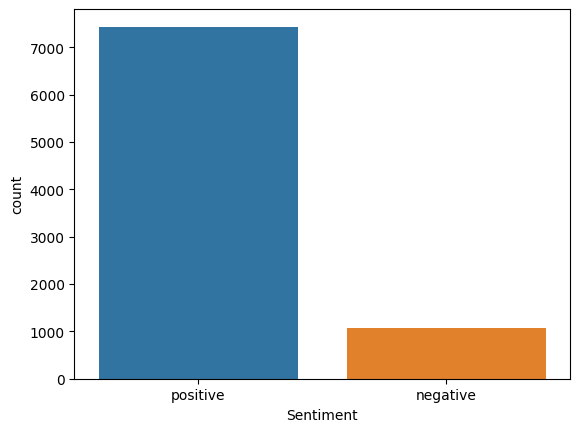

In [10]:
import seaborn as sns

sns.countplot(x='Sentiment', data=df)

In [11]:
df.head(10)

,Review Title,Review text,Ratings,Sentiment
0,Nice product,"Nice product, good quality, but price is now r...",4,positive
1,Don't waste your money,They didn't supplied Yonex Mavis 350. Outside ...,1,negative
2,Did not meet expectations,Worst product. Damaged shuttlecocks packed in ...,1,negative
3,Fair,"Quite O. K. , but nowadays the quality of the...",3,positive
4,Over priced,Over pricedJust â?¹620 ..from retailer.I didn'...,1,negative
5,Mind-blowing purchase,Good quality product. Delivered on time.READ MORE,5,positive
6,Must buy!,BEST PURCHASE It is a good quality and is more...,5,positive
7,Classy product,Good quality original shuttles.READ MORE,5,positive
8,Great product,AwesomeREAD MORE,5,positive
9,Just wow!,nice original productsREAD MORE,5,positive


##### Spliting the input and output as train and test data

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Review text
1372,Very good.READ MORE
3846,Have been purchasing the shuttles from Flipkar...
333,Nice product. .READ MORE
1259,Worst on recent times.We played new Ball today...
3532,BetterREAD MORE


##### Perform Data Preprocessing

In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):

    text = str(text)

    # Remove 'READ MORE' if found
    text = text.replace('READ MORE', '')

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r':\)|:\(|:\D|:\S', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    filtered_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return pd.Series([" ".join(filtered_text), len(filtered_text)])

In [18]:
# pip install tqdm

In [19]:
from tqdm import tqdm, tqdm_notebook

In [20]:
tqdm.pandas()

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sunny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##### Data Pre-Processing on Training Input Data

In [22]:
temp_df = X_train['Review text'].progress_apply(lambda x: preprocess_text(x))

temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 6808/6808 [00:08<00:00, 806.49it/s]


,0,1
1372,good,1
3846,purchasing shuttle flipkart long time quality ...,15
333,nice product,2
1259,worst recent timeswe played new ball todaytwo ...,40
3532,better,1


In [23]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

In [24]:
X_train = pd.concat([X_train, temp_df], axis=1)

X_train.head()

,Review text,clean_text_lemma,text_length_lemma
1372,Very good.READ MORE,good,1
3846,Have been purchasing the shuttles from Flipkar...,purchasing shuttle flipkart long time quality ...,15
333,Nice product. .READ MORE,nice product,2
1259,Worst on recent times.We played new Ball today...,worst recent timeswe played new ball todaytwo ...,40
3532,BetterREAD MORE,better,1


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lemma'])

In [26]:
X_train_bow

<6808x2702 sparse matrix of type '<class 'numpy.int64'>'
	with 22522 stored elements in Compressed Sparse Row format>

##### Data Pre-Processing on Input Test Data

In [27]:
temp_df = X_test['Review text'].progress_apply(lambda x: preprocess_text(x))

temp_df.head()

100%|████████████████████████████████████████████████████████████████████████████| 1702/1702 [00:01<00:00, 1137.24it/s]


,0,1
4392,good,1
8424,good original product,3
2138,good quality,2
3538,good,1
2684,thanks,1


In [28]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
4392,good,1
8424,good original product,3
2138,good quality,2
3538,good,1
2684,thanks,1


In [29]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,Review text,clean_text_lemma,text_length_lemma
4392,Not goodREAD MORE,good,1
8424,Very good and original product.READ MORE,good original product,3
2138,Very good qualityREAD MORE,good quality,2
3538,GoodREAD MORE,good,1
2684,ThanksREAD MORE,thanks,1


In [30]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

In [31]:
print("Shape of input data:", X_test_bow.shape)

Shape of input data: (1702, 2702)


##### Model Creation and Evaluation

#### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

LogisticRegression()

In [33]:
y_test_pred = classifier.predict(X_test_bow)

In [34]:
print(len(y_test_pred))

1702


In [35]:
y_test

4392    positive
8424    positive
2138    positive
3538    positive
2684    positive
          ...   
764     positive
6846    positive
7761    positive
7627    positive
2221    positive
Name: Sentiment, Length: 1702, dtype: object

In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_test_pred, pos_label='positive')
print(f1)

print(classification_report(y_test, y_test_pred))

0.9556358856391719
              precision    recall  f1-score   support

    negative       0.78      0.52      0.63       216
    positive       0.93      0.98      0.96      1486

    accuracy                           0.92      1702
   macro avg       0.86      0.75      0.79      1702
weighted avg       0.91      0.92      0.91      1702



### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

DecisionTreeClassifier()

In [38]:
y_test_pred = classifier.predict(X_test_bow)

In [39]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test, y_test_pred, pos_label='positive')
print(f1)
print(classification_report(y_test, y_test_pred))

0.9394040843655842
              precision    recall  f1-score   support

    negative       0.59      0.55      0.57       216
    positive       0.93      0.94      0.94      1486

    accuracy                           0.89      1702
   macro avg       0.76      0.75      0.75      1702
weighted avg       0.89      0.89      0.89      1702



### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

RandomForestClassifier()

In [41]:
y_test_pred = classifier.predict(X_test_bow)

In [42]:
from sklearn.metrics import f1_score, classification_report

f1 = f1_score(y_test, y_test_pred, pos_label='positive')
print(f1)

print(classification_report(y_test, y_test_pred))

0.9549193813754524
              precision    recall  f1-score   support

    negative       0.77      0.53      0.62       216
    positive       0.93      0.98      0.95      1486

    accuracy                           0.92      1702
   macro avg       0.85      0.75      0.79      1702
weighted avg       0.91      0.92      0.91      1702



### SVM

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Initialize SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_bow, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_bow)

# Assuming 'negative' is the positive class label
f1_svm = f1_score(y_test, y_pred_svm, pos_label='positive')
print("SVM F1-score:", f1_svm)
print(classification_report(y_test, y_test_pred))

SVM F1-score: 0.953550099535501
              precision    recall  f1-score   support

    negative       0.77      0.53      0.62       216
    positive       0.93      0.98      0.95      1486

    accuracy                           0.92      1702
   macro avg       0.85      0.75      0.79      1702
weighted avg       0.91      0.92      0.91      1702



##### Creating Pipeline with caching

In [44]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

In [45]:
import joblib
from joblib import Memory

import os

In [46]:
import warnings

warnings.filterwarnings('ignore')

In [47]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__C': [0.1, 1, 10],
            'classifier__penalty': ['elasticnet'],
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train['clean_text_lemma'], y_train)

    best_models[algo] = grid_search.best_estimator_

    print('Score on Test Data: ', grid_search.score(X_test['clean_text_lemma'], y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 10.1 s
Wall time: 17.2 s
Score on Test Data:  0.9153936545240893
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 30.2 s
Wall time: 49.4 s
Score on Test Data:  0.9136310223266745
********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: total: 7min 42s
Wall time: 13min 18s
Score on Test Data:  0.9059929494712103


In [48]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1000)),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=5000)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])



In [49]:
from sklearn import metrics

##### Serialization of the models as pickle files

In [53]:
for name, model in best_models.items():
    print("*"*10, name, "*"*10)

    joblib.dump(model, r'D:\DATA_SCIENCE_INTERNSHIP\TASK-6\my_project\best_models\{name}.pkl')
    model = joblib.load(r'D:\DATA_SCIENCE_INTERNSHIP\TASK-6\my_project\best_models\{name}.pkl')

    %time y_test_pred = model.predict(X_test['clean_text_lemma'])
    print("Test Score (accuracy))", metrics.accuracy_score(y_test, y_test_pred))

    print("Model Size:", os.path.getsize(r'D:\DATA_SCIENCE_INTERNSHIP\TASK-6\my_project\best_models\{name}.pkl'), "Bytes")

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 16 ms
Test Score (accuracy)) 0.9153936545240893
Model Size: 81447 Bytes
********** decision_tree **********
CPU times: total: 15.6 ms
Wall time: 16 ms
Test Score (accuracy)) 0.9136310223266745
Model Size: 84649 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 16 ms
Test Score (accuracy)) 0.9059929494712103
Model Size: 90826 Bytes


##### Deserialization of the models

In [54]:
def preprocess_text(text):

    text = str(text)

    # Remove 'READ MORE' if found
    text = text.replace('READ MORE', '')

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r':\)|:\(|:\D|:\S', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_text = [word for word in words if word not in stop_words]
    filtered_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return " ".join(filtered_text)

In [55]:
# Deserialization

model = joblib.load(r"D:\DATA_SCIENCE_INTERNSHIP\TASK-6\my_project\best_models\{logistic}.pkl")

# The following article was fetched from:
# https://www.cnbc.com/2024/03/01/euro-zone-inflation-q1-2024.html
# https://www.nbcnews.com/news/aliens-miami-mall-police-response-viral-speculation-rcna132524
new_data = [
    "The Product quality was somewhat ok"
]

new_data_clean = [preprocess_text(doc) for doc in new_data]

prediction = model.predict(new_data_clean)

print("Prediction:", prediction)    

Prediction: ['positive']
